In [1]:
import  pandas as pd 
import numpy as np 
import sklearn
from sklearn.metrics import accuracy_score , f1_score , recall_score ,roc_auc_score as roc 
atributes = [ 'Class', 'age', 'menopause', 'tumor-size' ,'inv-nodes', 'node-caps', 'deg-malig' ,'breast', 'breast-quad', 'irradiat']
missing = [np.nan , None , "" , "?"]
df = pd.read_csv('./data/breast-cancer.csv', names=atributes, na_values=missing) 
print(df.head())


for i in df:
    print("sum of nans in {} : {} ".format(i,df[i].isna().sum() ))
print(df)

## convert ages 
ages = []
for row in df["age"]:
    if row == "20-29":
        ages.append(0)
    elif row == "30-39":
        ages.append(1)
    elif row == "40-49":
        ages.append(2)
    elif row == "50-59":
        ages.append(3)
    elif row == "60-69":
        ages.append(4)
    elif row == "70-79":
        ages.append(5)
    else :
        ages.append(6)
ages_df = pd.DataFrame(ages)


df["age"] = ages_df
sizes_table = []
for row in df["tumor-size"]:
#     print(row)
    if row == '0-4':
        sizes_table.append(0)
    elif row == '5-9':
        sizes_table.append(1)
    elif row == '10-14':
        sizes_table.append(2)
    elif row == '15-19':
        sizes_table.append(3)
    elif row == '20-24':
        sizes_table.append(4)
    elif row == '25-29':
        sizes_table.append(5)
    elif row == '30-34':
        sizes_table.append(6)       
    elif row == '35-39':
        sizes_table.append(7)       
    elif row == '40-44':
        sizes_table.append(8)
    elif row == '45-49':
        sizes_table.append(9)
    elif row == '50-54' :
        sizes_table.append(10)

        
sizes_table_df = pd.DataFrame(sizes_table)
df["tumor-size"] = sizes_table_df


### gia inv-nodes
table = []
for row in df["inv-nodes"]:
#     print(row)
    if row == '0-2':
        table.append(0)
    elif row == '3-5':
        table.append(1)
    elif row == '6-8':
        table.append(2)
    elif row == '9-11':
        table.append(3)
    elif row == '12-14':
        table.append(4)
    elif row == '15-17':
        table.append(5)
    elif row == '24-26':
        table.append(6)       
        

table_df = pd.DataFrame(table)
df["inv-nodes"] = table_df

                  Class    age menopause tumor-size inv-nodes node-caps  \
0  no-recurrence-events  30-39   premeno      30-34       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  40-49   premeno      20-24       0-2        no   
3  no-recurrence-events  60-69      ge40      15-19       0-2        no   
4  no-recurrence-events  40-49   premeno        0-4       0-2        no   

   deg-malig breast breast-quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no  
sum of nans in Class : 0 
sum of nans in age : 0 
sum of nans in menopause : 0 
sum of nans in tumor-size : 0 
sum of nans in inv-nodes : 0 
sum of nans in node-caps : 8 
sum of nans in deg-malig : 0 
sum of nans in breast : 0 
sum of nans in breast-quad : 1 
sum of nans in irradiat : 0 
  

In [2]:
dummie_df = pd.get_dummies(df , columns = ['menopause' , 'node-caps' ,'breast' ,'breast-quad','irradiat'  ] , drop_first=True )

In [3]:
dummie_df


,Class,age,tumor-size,inv-nodes,deg-malig,menopause_lt40,menopause_premeno,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,no-recurrence-events,1,6,0,3,0,1,0,0,1,0,0,0,0
1,no-recurrence-events,2,4,0,2,0,1,0,1,0,0,0,1,0
2,no-recurrence-events,2,4,0,2,0,1,0,0,1,0,0,0,0
3,no-recurrence-events,4,3,0,2,0,0,0,1,0,1,0,0,0
4,no-recurrence-events,2,0,0,2,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,1,6,0,2,0,1,0,0,0,1,0,0,0
282,recurrence-events,1,4,0,3,0,1,0,0,0,1,0,0,1
283,recurrence-events,4,4,0,1,0,0,0,1,0,1,0,0,0
284,recurrence-events,2,6,1,3,0,0,0,0,1,0,0,0,0


In [4]:
dummie_df["Class"] = dummie_df["Class"].replace("no-recurrence-events", 0)
dummie_df["Class"] = dummie_df["Class"].replace("recurrence-events", 1)

### SPLIT

In [5]:

from sklearn.model_selection import train_test_split
data  = dummie_df.drop(columns='Class')
# for i in full_dataset:
#     print(full_dataset[i])

res = dummie_df["Class"]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, res, test_size=0.5,random_state=30) # 80% training and 20% test

### train the algorithms 

In [6]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble.forest import RandomForestClassifier
clf = RandomForestClassifier( n_estimators=100 , random_state= 0)
clf.fit(X_train ,y_train)

#SVM kernel = linear 
from sklearn.svm import SVC
svm_lin = SVC(kernel='linear') 
svm_lin.fit(X_train, y_train)

# SVM kerner = rbf 
svm_rbf = SVC(kernel= 'rbf')
svm_rbf.fit(X_train, y_train)

#KNN n_neighbors =2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors=2 )
knn.fit(X_train, y_train)


C:\Users\tzav2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

### print ACCURACIES 

In [7]:
list_of_models = [clf, knn,svm_lin, svm_rbf   ]
names = ['RF' , 'KNN' , 'SVM (linear)' , 'SVM(RBF)']
j=-1
accuracy_from_origin={}
AUC_origin = {}
for i in list_of_models:
    print("="*25)
    j+=1
    y_pred = i.predict(X_test)
    print("Accuracy score for {} :    {}".format(names[j] , accuracy_score(y_test , y_pred) ))
    print("F1 score for : {} :        {}".format(names[j],f1_score(y_test, y_pred)))
    print("auc curve accuracy for {} :  {} ".format( names[j], roc(y_test, y_pred)))
    print("recall score for {} : {} ".format(names[j] , recall_score(y_test , y_pred)))
    accuracy_from_origin[names[j]]= accuracy_score(y_test,y_pred)
    AUC_origin[names[j]] = roc(y_test,y_pred)

Accuracy score for RF :    0.6783216783216783
F1 score for : RF :        0.25806451612903225
auc curve accuracy for RF :  0.5380232558139534 
recall score for RF : 0.18604651162790697 
Accuracy score for KNN :    0.7062937062937062
F1 score for : KNN :        0.22222222222222218
auc curve accuracy for KNN :  0.5447674418604651 
recall score for KNN : 0.13953488372093023 
Accuracy score for SVM (linear) :    0.6713286713286714
F1 score for : SVM (linear) :        0.3380281690140845
auc curve accuracy for SVM (linear) :  0.5595348837209302 
recall score for SVM (linear) : 0.27906976744186046 
Accuracy score for SVM(RBF) :    0.6853146853146853
F1 score for : SVM(RBF) :        0.1176470588235294
auc curve accuracy for SVM(RBF) :  0.5098837209302325 
recall score for SVM(RBF) : 0.06976744186046512 


In [8]:
#over sample the set 
accuracy_from_origin.values()

dict_values([0.6783216783216783, 0.7062937062937062, 0.6713286713286714, 0.6853146853146853])

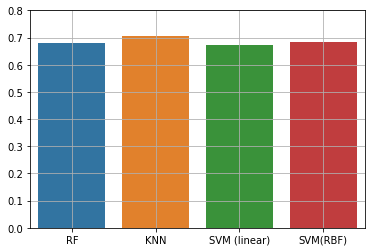

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(  list ( accuracy_from_origin.keys() ) , list(accuracy_from_origin.values()) )
plt.ylim([0,0.8])
plt.grid()

## OVER SAMPLING with SMOTE

In [15]:
from imblearn.over_sampling import SMOTE 
from collections import Counter
oversampling = SMOTE()
data_over , res_over = oversampling.fit_resample(data ,res )
Counter(res_over)
X_train, X_test, y_train, y_test = train_test_split(data_over, res_over, test_size=0.2,random_state=30) # 80% training and 20% test

In [16]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble.forest import RandomForestClassifier
clf = RandomForestClassifier( n_estimators=100 , random_state= 0)
clf.fit(X_train ,y_train)

#SVM kernel = linear 
from sklearn.svm import SVC
svm_lin = SVC(kernel='linear') 
svm_lin.fit(X_train, y_train)

# SVM kerner = rbf 
svm_rbf = SVC(kernel= 'rbf')
svm_rbf.fit(X_train, y_train)

#KNN n_neighbors =2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors=2 )
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

### accuracies after over sampling with smote

In [17]:
list_of_models = [clf, knn,svm_lin, svm_rbf   ]
names = ['RF' , 'KNN' , 'SVM (linear)' , 'SVM(RBF)']
j=-1
accuracy_from_SMOTE = {}
AUC_SMOTE = {}
for i in list_of_models:
    print("="*25)
    j+=1
    y_pred = i.predict(X_test)
    print("Accuracy score for {} :    {}".format(names[j] , accuracy_score(y_test , y_pred) ))
    print("F1 score for : {} :        {}".format(names[j],f1_score(y_test, y_pred)))
    print("auc curve accuracy for {} :  {} ".format( names[j], roc(y_test, y_pred)))
    print("recall score for {} :     {} ".format(names[j] , recall_score(y_test , y_pred)))
    accuracy_from_SMOTE[names[j]]= accuracy_score(y_test,y_pred)
    AUC_SMOTE[names[j]] = roc(y_test,y_pred)
    

Accuracy score for RF :    0.7160493827160493
F1 score for : RF :        0.7415730337078651
auc curve accuracy for RF :  0.714939024390244 
recall score for RF :     0.8048780487804879 
Accuracy score for KNN :    0.691358024691358
F1 score for : KNN :        0.6913580246913581
auc curve accuracy for KNN :  0.6914634146341463 
recall score for KNN :     0.6829268292682927 
Accuracy score for SVM (linear) :    0.6049382716049383
F1 score for : SVM (linear) :        0.627906976744186
auc curve accuracy for SVM (linear) :  0.6042682926829269 
recall score for SVM (linear) :     0.6585365853658537 
Accuracy score for SVM(RBF) :    0.6049382716049383
F1 score for : SVM(RBF) :        0.6363636363636364
auc curve accuracy for SVM(RBF) :  0.6039634146341464 
recall score for SVM(RBF) :     0.6829268292682927 


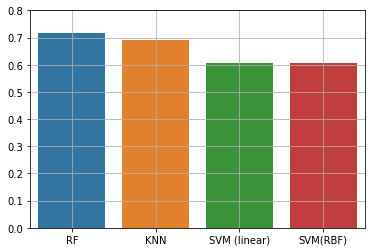

In [18]:
sns.barplot(  list ( accuracy_from_SMOTE.keys() ) , list(accuracy_from_SMOTE.values()) )
plt.ylim([0,0.8])
plt.grid()

### OVER SAMPLING WITH RandomOverSampler 

In [21]:
# random overampler 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
data_over , res_over = ros.fit_resample(data ,res )
Counter(res_over)
X_train, X_test, y_train, y_test = train_test_split(data_over, res_over, test_size=0.2,random_state=30) # 80% training and 20% test

In [22]:
list_of_models = [clf, knn,svm_lin, svm_rbf   ]
names = ['RF' , 'KNN' , 'SVM (linear)' , 'SVM(RBF)']
j=-1
accuracy_from_R = {}
AUC_R = {}
for i in list_of_models:
    print("="*25)
    j+=1
    y_pred = i.predict(X_test)
    print("Accuracy score for {} :    {}".format(names[j] , accuracy_score(y_test , y_pred) ))
    print("F1 score for : {} :        {}".format(names[j],f1_score(y_test, y_pred)))
    print("auc curve accuracy for {} :  {} ".format( names[j], roc(y_test, y_pred)))
    print("recall score for {} :     {} ".format(names[j] , recall_score(y_test , y_pred)))
    accuracy_from_R[names[j]]= accuracy_score(y_test,y_pred)
    AUC_R[names[j]] = roc(y_test,y_pred)
    

Accuracy score for RF :    0.7037037037037037
F1 score for : RF :        0.7272727272727273
auc curve accuracy for RF :  0.7027439024390244 
recall score for RF :     0.7804878048780488 
Accuracy score for KNN :    0.5925925925925926
F1 score for : KNN :        0.547945205479452
auc curve accuracy for KNN :  0.5939024390243902 
recall score for KNN :     0.4878048780487805 
Accuracy score for SVM (linear) :    0.5308641975308642
F1 score for : SVM (linear) :        0.525
auc curve accuracy for SVM (linear) :  0.5310975609756098 
recall score for SVM (linear) :     0.5121951219512195 
Accuracy score for SVM(RBF) :    0.5802469135802469
F1 score for : SVM(RBF) :        0.6046511627906976
auc curve accuracy for SVM(RBF) :  0.5795731707317073 
recall score for SVM(RBF) :     0.6341463414634146 


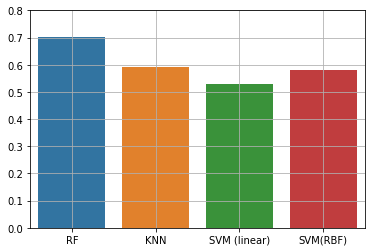

In [23]:
sns.barplot(  list ( accuracy_from_R.keys() ) , list(accuracy_from_R.values()) )
plt.ylim([0,0.8])
plt.grid()

## NEXT WITHOUT  One Hot Encoding 